<a href="https://colab.research.google.com/github/Sahanaka/fyp-main-blocks/blob/main/models/deeplearning/fyp_audio_classification_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
PATH = '/content/drive/MyDrive/Final Year Project/Audio_data/20_second'

In [5]:
audio_folders = os.listdir(PATH)
audio_folders

['Category_1', 'Category_2', 'Category_4', 'Category_5', 'Category_3']

In [6]:
CATEGORIES = os.listdir(PATH)
CATEGORIES

['Category_1', 'Category_2', 'Category_4', 'Category_5', 'Category_3']

In [7]:
def extract_labels_from_audio_file():
  patient_category = []
  patient_level = []
  patient_id = []
  file_path = []

  for category in CATEGORIES:
    levels = os.listdir(os.path.join(PATH, category))
    for level in levels:
        sample_folders = os.listdir(os.path.join(PATH, category, level))
        for fs in sample_folders:
            audios = os.listdir(os.path.join(PATH, category, level, fs))
            for audio in audios:
                patient_category.append(category)
                patient_id.append(fs)
                patient_level.append(level)
                file_path.append(PATH + '/' + category + '/' + level + '/' + fs + '/' + audio)
  
  return patient_category, patient_level, patient_id, file_path
      

In [8]:
patient_category, patient_level, patient_id, file_path = extract_labels_from_audio_file()

In [9]:
print(len(patient_category))
print(len(patient_level))
print(len(patient_id))
print(len(file_path))

1555
1555
1555
1555


In [10]:
def create_main_dataframe(patient_category, patient_level, patient_id, file_path):
  df = pd.DataFrame(patient_id)
  df = pd.concat([df, pd.DataFrame(patient_category), pd.DataFrame(patient_level), pd.DataFrame(file_path)], axis=1)
  df.columns = ['chat_id', 'category', 'level', 'file_path']
  return df

In [11]:
audio_df = create_main_dataframe(patient_category, patient_level, patient_id, file_path)
audio_df

,chat_id,category,level,file_path
0,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...
1,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...
2,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...
3,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...
4,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...
...,...,...,...,...
1550,fridriksson09a,Category_3,Level_7,/content/drive/MyDrive/Final Year Project/Audi...
1551,fridriksson09a,Category_3,Level_7,/content/drive/MyDrive/Final Year Project/Audi...
1552,fridriksson09a,Category_3,Level_7,/content/drive/MyDrive/Final Year Project/Audi...
1553,fridriksson09a,Category_3,Level_7,/content/drive/MyDrive/Final Year Project/Audi...


In [12]:
# SAVE TO CSV
audio_df.to_csv('labelsandcategories.csv')

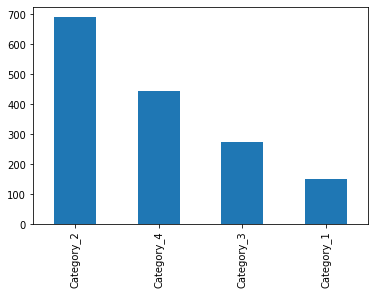

In [13]:
audio_df.category.value_counts().plot(kind='bar')

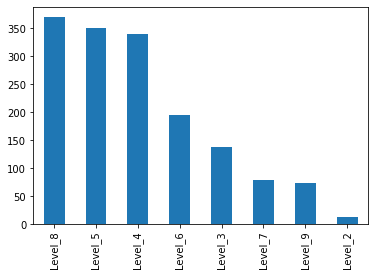

In [14]:
audio_df.level.value_counts().plot(kind='bar')

## **Feature Extraction**

In [15]:
!pip install librosa soundfile pyaudio

  ERROR: Failed building wheel for pyaudio
  Running setup.py clean for pyaudio
Failed to build pyaudio
    Running setup.py install for pyaudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-_cmpvp0k/pyaudio_a48a599248a048e8be2d80e7699ffce8/setup.py'"'"'; __file__='"'"'/tmp/pip-install-_cmpvp0k/pyaudio_a48a599248a048e8be2d80e7699ffce8/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-c06648nh/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pyaudio Check the logs for full command output.


In [16]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np

In [17]:
df = pd.DataFrame(columns=['feature'])

In [18]:
#audio_df = audio_df.sample(frac=1)

In [21]:
def mfcc():
  counter=0

  for index,path in enumerate(audio_df.file_path):
      X, sample_rate = librosa.load(path, res_type='kaiser_fast')

      # Mel-frequency cepstral coefficients (MFCCs)
      mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
      mfcc=np.mean(mfcc.T,axis=0)

      df.loc[counter] = [mfcc]

      counter=counter+1

In [22]:
mfcc()

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [23]:
df

,feature
0,"[-490.52325, 93.05832, 15.143592, 18.513876, -..."
1,"[-479.6617, 84.97681, 10.151739, 18.160892, -1..."
2,"[-511.0799, 80.8943, 14.29749, 24.355162, 0.66..."
3,"[-509.2689, 74.20791, 13.725127, 25.315771, -2..."
4,"[-488.17493, 76.555916, 9.914968, 21.65506, -6..."
...,...
1550,"[-377.7532, 102.124344, 26.090614, 32.64139, 9..."
1551,"[-360.21146, 102.980125, 23.590628, 35.154114,..."
1552,"[-372.56427, 107.656944, 27.600674, 29.607925,..."
1553,"[-374.68518, 102.88146, 27.5743, 32.98175, 5.8..."


In [24]:
df_combined = pd.concat([audio_df, pd.DataFrame(df['feature'].values.tolist())], axis=1)


In [25]:
df_combined.head()

,chat_id,category,level,file_path,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...,-490.523254,93.058319,15.143592,18.513876,-0.433573,11.152573,-17.194874,9.989197,-10.891001,6.643106,-5.495720,7.031787,-11.009451,0.974317,-9.005354,2.729958,-5.104247,-1.544405,-4.415594,-2.074256,-3.384052,-0.443634,-2.688724,-3.418670,-4.822689,-4.704906,-3.404803,-4.179553,-2.270333,-0.360193,1.738912,0.307543,-0.795415,-2.538493,-1.893930,-1.758048,-0.869887,-1.517332,-0.187803,-0.250476
1,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...,-479.661713,84.976807,10.151739,18.160892,-1.766252,7.677698,-17.285727,12.311849,-8.332493,0.864658,-4.439166,1.186121,-10.336357,-2.503848,-7.061597,-0.452766,-3.357195,-3.845896,-3.495178,-2.973658,-1.196113,-2.843426,-1.508193,-1.958241,-2.445113,-4.424742,-3.176868,-2.106225,-1.178757,0.037847,2.652165,1.647938,1.617471,-1.455345,-0.585223,-0.767716,-0.011982,-0.914854,1.003164,0.580475
2,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...,-511.079895,80.894302,14.297490,24.355162,0.663887,13.512637,-14.548347,9.517064,-9.332596,6.391305,-4.050129,6.683888,-9.753930,1.111590,-8.144116,2.155095,-5.492582,-1.726046,-4.962095,-2.240582,-2.483881,0.525715,-0.949120,-1.197296,-4.265597,-4.451360,-3.190795,-3.725389,-2.330483,-1.411086,2.551144,1.708490,1.578291,-2.077202,-1.879858,-1.996247,-0.442554,-0.137897,1.435654,-0.590430
3,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...,-509.268890,74.207909,13.725127,25.315771,-2.379652,16.047503,-15.897813,11.424221,-11.660525,8.167130,-6.418865,6.946535,-11.195179,1.957581,-8.868975,2.604149,-6.486872,-0.403991,-6.623010,-1.564482,-4.704385,0.558096,-2.959500,-0.394820,-4.749582,-3.714967,-3.041086,-2.077764,-2.927063,-0.377616,3.047457,1.574166,0.183749,-2.689222,-2.500400,-2.295477,-0.405261,-0.283146,0.438287,-0.371677
4,adler11a,Category_1,Level_2,/content/drive/MyDrive/Final Year Project/Audi...,-488.174927,76.555916,9.914968,21.655060,-6.825299,13.488177,-15.654405,10.329707,-12.435306,7.010334,-7.611792,7.515129,-8.852178,2.260623,-8.672438,2.691853,-6.553704,-1.777329,-7.193696,-1.184935,-3.935981,0.010293,-2.478228,-1.206932,-3.753352,-2.480899,-3.435226,-2.168462,-2.453566,0.015112,1.537850,1.108071,1.055663,-3.071975,-1.682373,-1.608160,-0.303727,-0.984612,-0.023244,-0.020585


In [26]:
df_combined.to_csv("fulldataframenew40.csv")

In [27]:
# Categories
y=np.array(df_combined['category'].tolist())
y

array(['Category_1', 'Category_1', 'Category_1', ..., 'Category_3',
       'Category_3', 'Category_3'], dtype='<U10')

In [28]:
y.shape

(1555,)

In [29]:
df_combined_new = df_combined.drop('file_path',axis=1)
df_combined_new.head()

,chat_id,category,level,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,adler11a,Category_1,Level_2,-490.523254,93.058319,15.143592,18.513876,-0.433573,11.152573,-17.194874,9.989197,-10.891001,6.643106,-5.495720,7.031787,-11.009451,0.974317,-9.005354,2.729958,-5.104247,-1.544405,-4.415594,-2.074256,-3.384052,-0.443634,-2.688724,-3.418670,-4.822689,-4.704906,-3.404803,-4.179553,-2.270333,-0.360193,1.738912,0.307543,-0.795415,-2.538493,-1.893930,-1.758048,-0.869887,-1.517332,-0.187803,-0.250476
1,adler11a,Category_1,Level_2,-479.661713,84.976807,10.151739,18.160892,-1.766252,7.677698,-17.285727,12.311849,-8.332493,0.864658,-4.439166,1.186121,-10.336357,-2.503848,-7.061597,-0.452766,-3.357195,-3.845896,-3.495178,-2.973658,-1.196113,-2.843426,-1.508193,-1.958241,-2.445113,-4.424742,-3.176868,-2.106225,-1.178757,0.037847,2.652165,1.647938,1.617471,-1.455345,-0.585223,-0.767716,-0.011982,-0.914854,1.003164,0.580475
2,adler11a,Category_1,Level_2,-511.079895,80.894302,14.297490,24.355162,0.663887,13.512637,-14.548347,9.517064,-9.332596,6.391305,-4.050129,6.683888,-9.753930,1.111590,-8.144116,2.155095,-5.492582,-1.726046,-4.962095,-2.240582,-2.483881,0.525715,-0.949120,-1.197296,-4.265597,-4.451360,-3.190795,-3.725389,-2.330483,-1.411086,2.551144,1.708490,1.578291,-2.077202,-1.879858,-1.996247,-0.442554,-0.137897,1.435654,-0.590430
3,adler11a,Category_1,Level_2,-509.268890,74.207909,13.725127,25.315771,-2.379652,16.047503,-15.897813,11.424221,-11.660525,8.167130,-6.418865,6.946535,-11.195179,1.957581,-8.868975,2.604149,-6.486872,-0.403991,-6.623010,-1.564482,-4.704385,0.558096,-2.959500,-0.394820,-4.749582,-3.714967,-3.041086,-2.077764,-2.927063,-0.377616,3.047457,1.574166,0.183749,-2.689222,-2.500400,-2.295477,-0.405261,-0.283146,0.438287,-0.371677
4,adler11a,Category_1,Level_2,-488.174927,76.555916,9.914968,21.655060,-6.825299,13.488177,-15.654405,10.329707,-12.435306,7.010334,-7.611792,7.515129,-8.852178,2.260623,-8.672438,2.691853,-6.553704,-1.777329,-7.193696,-1.184935,-3.935981,0.010293,-2.478228,-1.206932,-3.753352,-2.480899,-3.435226,-2.168462,-2.453566,0.015112,1.537850,1.108071,1.055663,-3.071975,-1.682373,-1.608160,-0.303727,-0.984612,-0.023244,-0.020585


In [30]:
x = df_combined_new.iloc[:,3:]
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-490.523254,93.058319,15.143592,18.513876,-0.433573,11.152573,-17.194874,9.989197,-10.891001,6.643106,-5.495720,7.031787,-11.009451,0.974317,-9.005354,2.729958,-5.104247,-1.544405,-4.415594,-2.074256,-3.384052,-0.443634,-2.688724,-3.418670,-4.822689,-4.704906,-3.404803,-4.179553,-2.270333,-0.360193,1.738912,0.307543,-0.795415,-2.538493,-1.893930,-1.758048,-0.869887,-1.517332,-0.187803,-0.250476
1,-479.661713,84.976807,10.151739,18.160892,-1.766252,7.677698,-17.285727,12.311849,-8.332493,0.864658,-4.439166,1.186121,-10.336357,-2.503848,-7.061597,-0.452766,-3.357195,-3.845896,-3.495178,-2.973658,-1.196113,-2.843426,-1.508193,-1.958241,-2.445113,-4.424742,-3.176868,-2.106225,-1.178757,0.037847,2.652165,1.647938,1.617471,-1.455345,-0.585223,-0.767716,-0.011982,-0.914854,1.003164,0.580475
2,-511.079895,80.894302,14.297490,24.355162,0.663887,13.512637,-14.548347,9.517064,-9.332596,6.391305,-4.050129,6.683888,-9.753930,1.111590,-8.144116,2.155095,-5.492582,-1.726046,-4.962095,-2.240582,-2.483881,0.525715,-0.949120,-1.197296,-4.265597,-4.451360,-3.190795,-3.725389,-2.330483,-1.411086,2.551144,1.708490,1.578291,-2.077202,-1.879858,-1.996247,-0.442554,-0.137897,1.435654,-0.590430
3,-509.268890,74.207909,13.725127,25.315771,-2.379652,16.047503,-15.897813,11.424221,-11.660525,8.167130,-6.418865,6.946535,-11.195179,1.957581,-8.868975,2.604149,-6.486872,-0.403991,-6.623010,-1.564482,-4.704385,0.558096,-2.959500,-0.394820,-4.749582,-3.714967,-3.041086,-2.077764,-2.927063,-0.377616,3.047457,1.574166,0.183749,-2.689222,-2.500400,-2.295477,-0.405261,-0.283146,0.438287,-0.371677
4,-488.174927,76.555916,9.914968,21.655060,-6.825299,13.488177,-15.654405,10.329707,-12.435306,7.010334,-7.611792,7.515129,-8.852178,2.260623,-8.672438,2.691853,-6.553704,-1.777329,-7.193696,-1.184935,-3.935981,0.010293,-2.478228,-1.206932,-3.753352,-2.480899,-3.435226,-2.168462,-2.453566,0.015112,1.537850,1.108071,1.055663,-3.071975,-1.682373,-1.608160,-0.303727,-0.984612,-0.023244,-0.020585


In [31]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [32]:
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [33]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
X_train.shape

(1244, 40)

In [35]:
y_train.shape

(1244, 4)

##Model Creation

In [36]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [43]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [44]:
num_labels=y.shape[1]

In [45]:
model=Sequential()
###first layer
model.add(Dense(300,input_shape=(X_train.shape[1],
)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               12300     
                                                                 
 activation_4 (Activation)   (None, 300)               0         
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 500)               150500    
                                                                 
 activation_5 (Activation)   (None, 500)               0         
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 300)              

In [47]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [48]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
32/39 [=======================>......] - ETA: 0s - loss: 23.0643 - accuracy: 0.3018
Epoch 00001: val_loss improved from inf to 1.42179, saving model to saved_models/audio_classification.hdf5
39/39 [==============================] - 1s 11ms/step - loss: 20.7518 - accuracy: 0.3127 - val_loss: 1.4218 - val_accuracy: 0.3826
Epoch 2/200
33/39 [========================>.....] - ETA: 0s - loss: 7.4636 - accuracy: 0.3419
Epoch 00002: val_loss improved from 1.42179 to 1.34481, saving model to saved_models/audio_classification.hdf5
39/39 [==============================] - 0s 7ms/step - loss: 7.1711 - accuracy: 0.3336 - val_loss: 1.3448 - val_accuracy: 0.2830
Epoch 3/200
31/39 [======================>.......] - ETA: 0s - loss: 4.0587 - accuracy: 0.3730
Epoch 00003: val_loss improved from 1.34481 to 1.33784, saving model to saved_models/audio_classification.hdf5
39/39 [==============================] - 0s 7ms/step - loss: 3.9576 - accuracy: 0.3658 - val_loss: 1.3378 - val_accuracy: 0.3

In [49]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9324758648872375


In [50]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 0, 2, 3, 0, 3, 2, 1, 1,
       1, 2, 2, 2, 1, 3, 3, 1, 3, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 3,
       1, 1, 0, 1, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 1, 1,
       2, 3, 2, 1, 1, 1, 3, 1, 3, 2, 1, 0, 1, 2, 1, 3, 1, 3, 0, 1, 3, 1,
       3, 1, 1, 1, 1, 0, 1, 3, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 3, 3, 2, 3, 2,
       0, 1, 2, 1, 2, 3, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 3, 3, 3, 1, 3,
       3, 3, 0, 2, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 2, 3, 1, 3, 1,
       1, 3, 1, 2, 2, 1, 1, 0, 3, 0, 2, 2, 1, 2, 1, 3, 1, 3, 0, 2, 3, 3,
       1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 1,
       1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 0, 1, 3, 3, 0, 1, 3,
       0, 0, 1, 1, 2, 2, 0, 1, 3, 3, 3, 0, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1, 0, 3, 1, 3,
       1, 3, 1, 1, 2, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1,

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# ADD NEW DIMENSIONS
X_train = X_train[:,:,np.newaxis]   
X_test = X_test[:,:,np.newaxis]
#X_validation = X_validation[:,:,np.newaxis]

In [ ]:
print(X_train.shape)
print(X_test.shape)
#print(X_validation.shape)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
# BUILD 1D CNN LAYERS
model_cnn = tf.keras.Sequential()
model_cnn.add(Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model_cnn.add(Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_cnn.add(MaxPooling1D(pool_size=(8)))
model_cnn.add(Dropout(0.4))
model_cnn.add(Conv1D(128, kernel_size=(10),activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=(8)))
model_cnn.add(Dropout(0.4))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_cnn.summary()